In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def process_bad_line(bad_line):
    first_column = [','.join(bad_line[:-6])]
    rest_columns = bad_line[-6:]
    good_line = first_column + rest_columns
    return good_line

df = pd.read_csv('./bestsellers with categories.csv', engine='python', sep=',', on_bad_lines=process_bad_line)
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head(5)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.shape

(550, 7)

In [4]:
# Відповідь: Про скільки книг зберігає дані датасет?
unique_books = df["name"].nunique()
print(f"Відповідь: {unique_books}")

Відповідь: 351


In [5]:
missed = df.isna().sum()
missed

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [6]:
# Відповідь: Чи є в якихось змінних пропуски? Так

In [7]:
# Відповідь: Які є унікальні жанри?
unique_genre = df["genre"].dropna().unique()
print(f"Унікальні жанри - {unique_genre}")

Унікальні жанри - ['Non Fiction' 'Fiction']


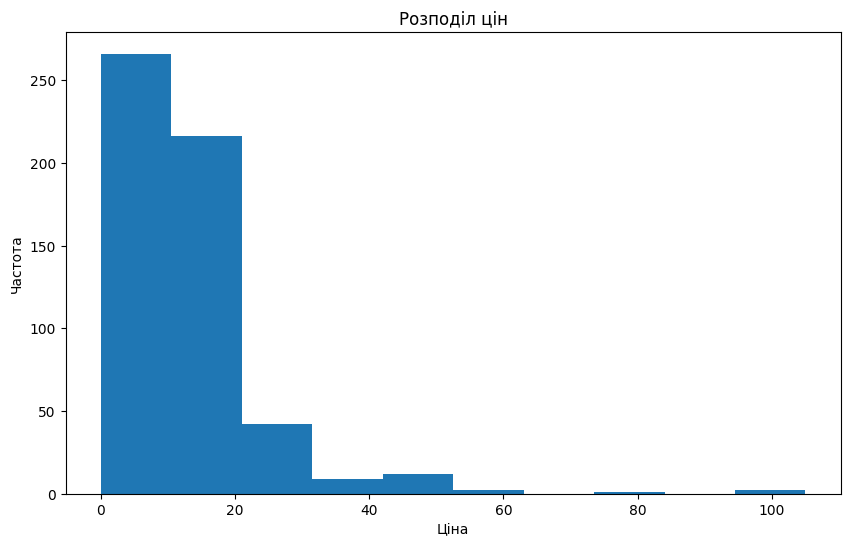

In [8]:
plt.figure(figsize=(10, 6))
df["price"].plot(kind='hist')
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

In [9]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Відповідь: Максимальна ціна? Відповідь - {max_price}")
print(f"Відповідь: Мінімальна ціна? Відповідь - {min_price}")
print(f"Відповідь: Середня ціна? Відповідь - {mean_price}")
print(f"Відповідь: Медіанна ціна? Відповідь - {median_price}")

Відповідь: Максимальна ціна? Відповідь - 105
Відповідь: Мінімальна ціна? Відповідь - 0
Відповідь: Середня ціна? Відповідь - 13.1
Відповідь: Медіанна ціна? Відповідь - 11.0


In [10]:
max_rating = df["user_rating"].max()
print(f"Відповідь: Який рейтинг у датасеті найвищий? Відповідь: {max_rating}")

books = df["user_rating"].value_counts()[max_rating]
print(f"Відповідь: Скільки книг мають такий рейтинг? Відповідь: {books}")

most_reviews = df["reviews"].idxmax()
most_reviews_name = df.loc[most_reviews, 'name']
print(f"Відповідь: Яка книга має найбільше відгуків? Відповідь: {most_reviews_name}")

top_50_2015 = df[df["year"] == 2015].sort_values(by='price', ascending=False).head(50)
top_price_2015 = top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()]
print(f"Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: {top_price_2015['name'].iloc[0]}")

fiction_books_2010 = ((df['genre'] == 'Fiction') & (df['year'] == 2010)).sum()
print(f"Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: {fiction_books_2010}")

books_4_9_rating = len(df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))])
print(f"Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: {books_4_9_rating}")

sorted_values = df[(df['year'] == 2015) & (df['price'] < 8.0)].sort_values(by='price', ascending=True)
last_book = sorted_values.iloc[-1]['name']
print(f"Відповідь: Яка книга остання у відсортованому списку? Відповідь: {last_book}")

Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9
Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52
Відповідь: Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition
Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20
Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1
Відповідь: Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)


In [11]:
genre_prices = df.groupby('genre')['price'].agg(['min', 'max'])
print(genre_prices)

max_price_fiction = genre_prices.loc['Fiction', 'max']
print(f"Відповідь: Максимальна ціна для жанру Fiction: {max_price_fiction}")

min_price_fiction = genre_prices.loc['Fiction', 'min']
print(f"Відповідь: Мінімальна ціна для жанру Fiction: {min_price_fiction}")

max_price_non_fiction = genre_prices.loc['Non Fiction', 'max']
print(f"Відповідь: Максимальна ціна для жанру Non Fiction: {max_price_non_fiction}")

min_price_non_fiction = genre_prices.loc['Non Fiction', 'min']
print(f"Відповідь: Мінімальна ціна для жанру Non Fiction: {min_price_non_fiction}")

new_df = df.groupby('author').agg({'name': 'count'})
print(new_df)

shape_of_df = new_df.shape[0]
print(f"Відповідь: Якої розмірності вийшла таблиця? Відповідь: {shape_of_df}")

most_books = new_df['name'].idxmax()
print(f"Відповідь: Який автор має найбільше книг? Відповідь: {most_books}")

author_books = new_df.loc[most_books, 'name']
print(f"Відповідь: Скільки книг цього автора? Відповідь: {author_books}")

             min  max
genre                
Fiction        0   82
Non Fiction    0  105
Відповідь: Максимальна ціна для жанру Fiction: 82
Відповідь: Мінімальна ціна для жанру Fiction: 0
Відповідь: Максимальна ціна для жанру Non Fiction: 105
Відповідь: Мінімальна ціна для жанру Non Fiction: 0
                            name
author                          
Abraham Verghese               2
Adam Gasiewski                 1
Adam Mansbach                  1
Adir Levy                      1
Admiral William H. McRaven     1
...                          ...
Walter Isaacson                3
William Davis                  2
William P. Young               2
Wizards RPG Team               3
Zhi Gang Sha                   2

[248 rows x 1 columns]
Відповідь: Якої розмірності вийшла таблиця? Відповідь: 248
Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney
Відповідь: Скільки книг цього автора? Відповідь: 12


In [12]:
new_df_2 = df.groupby('author').agg({'user_rating': 'mean'})
print(new_df_2)

min_rating = new_df_2['user_rating'].idxmin()
print(f"Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: {min_rating}")

author_rating = new_df_2.loc[min_rating, 'user_rating']
print(f"Відповідь: Який у цього автора середній рейтинг? Відповідь: {author_rating}")

                            user_rating
author                                 
Abraham Verghese               4.600000
Adam Gasiewski                 4.400000
Adam Mansbach                  4.800000
Adir Levy                      4.800000
Admiral William H. McRaven     4.700000
...                                 ...
Walter Isaacson                4.566667
William Davis                  4.400000
William P. Young               4.600000
Wizards RPG Team               4.800000
Zhi Gang Sha                   4.600000

[248 rows x 1 columns]
Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9


In [13]:
new_df_3 = pd.concat([new_df, new_df_2], axis=1)
print(new_df_3)
sorted_df = new_df_3.sort_values(by=['name', 'user_rating'], ascending=[True, True])
print(sorted_df)

first_author = sorted_df.index[0]
print(f"Відповідь: Який автор перший у списку? {first_author}")

                            name  user_rating
author                                       
Abraham Verghese               2     4.600000
Adam Gasiewski                 1     4.400000
Adam Mansbach                  1     4.800000
Adir Levy                      1     4.800000
Admiral William H. McRaven     1     4.700000
...                          ...          ...
Walter Isaacson                3     4.566667
William Davis                  2     4.400000
William P. Young               2     4.600000
Wizards RPG Team               3     4.800000
Zhi Gang Sha                   2     4.600000

[248 rows x 2 columns]
                                    name  user_rating
author                                               
Muriel Barbery                         1     4.000000
Chris Cleave                           1     4.100000
Ian K. Smith M.D.                      1     4.100000
Pierre Dukan                           1     4.100000
Elizabeth Strout                       1     4.200000


<Axes: xlabel='genre', ylabel='price'>

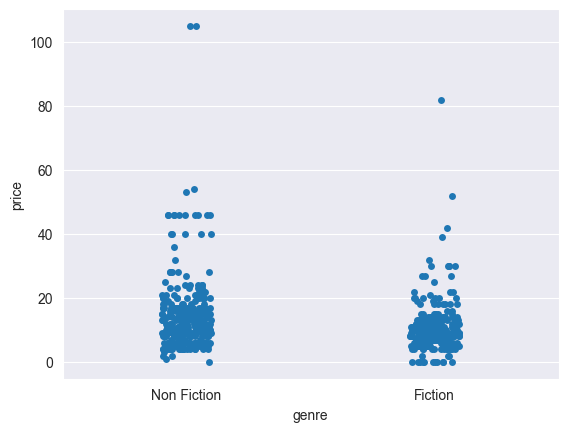

In [14]:
sns.set_style("darkgrid")
data = df
sns.stripplot(x='genre', y='price', data=data)

<Axes: xlabel='genre', ylabel='price'>

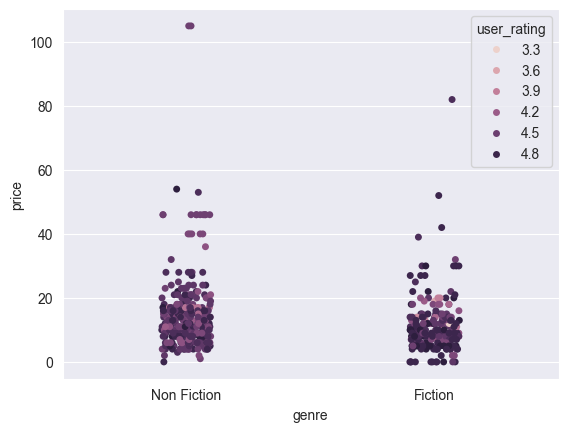

In [15]:
sns.stripplot(x='genre', y='price', hue='user_rating', data=data)